# Survival Analysis Lab

Complete the following exercises to solidify your knowledge of survival analysis.

In [20]:
import pandas as pd
import plotly.plotly as py
import cufflinks as cf
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

cf.go_offline()

In [3]:
data = pd.read_csv('../data/attrition.csv')

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

## 1. Generate and plot a survival function that shows how employee retention rates vary by gender and employee age.

*Tip: If your lines have gaps in them, you can fill them in by using the `fillna(method=ffill)` and the `fillna(method=bfill)` methods and then taking the average. We have provided you with a revised survival function below that you can use for the exercises in this lab*

In [5]:
def survival(data, group_field, time_field, event_field):
    kmf = KaplanMeierFitter()
    results = []

    for i in data[group_field].unique():
        group = data[data[group_field]==i]
        T = group[time_field]
        E = group[event_field]
        kmf.fit(T, E, label=str(i))
        results.append(kmf.survival_function_)

    survival = pd.concat(results, axis=1)
    front_fill = survival.fillna(method='ffill')
    back_fill = survival.fillna(method='bfill')
    smoothed = (front_fill + back_fill) / 2
    return smoothed

In [14]:
survival(data=data, group_field='Gender', time_field='YearsAtCompany', event_field="Attrition")

,Female,Male
timeline,,
0.0,0.993197,0.986395
1.0,0.956797,0.942452
2.0,0.938000,0.920975
3.0,0.923879,0.902917
4.0,0.912585,0.881528
5.0,0.890624,0.861027
6.0,0.881315,0.848334
7.0,0.864235,0.834195
8.0,0.848663,0.820565


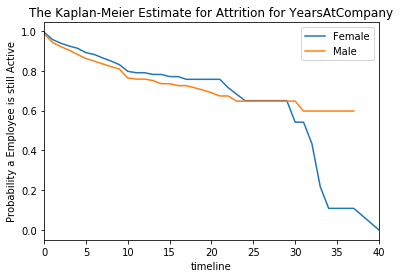

In [56]:
survival(data=data, group_field='Gender', time_field='YearsAtCompany', event_field="Attrition").plot()
plt.title("The Kaplan-Meier Estimate for Attrition for YearsAtCompany")
plt.ylabel("Probability a Employee is still Active")
plt.show()

## 2. Compare the plot above with one that plots employee retention rates by gender over the number of years the employee has been working for the company.

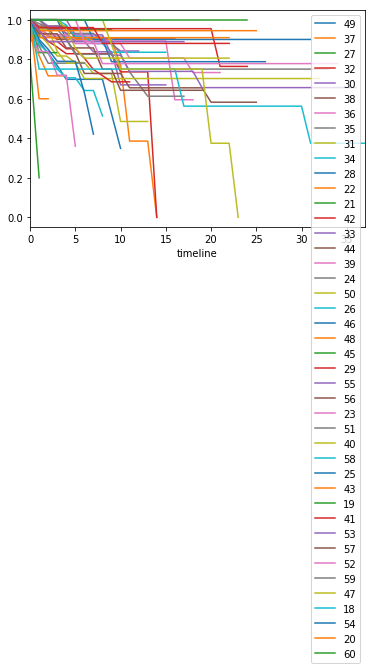

In [51]:
graf1 = survival(data=data[data['Gender']=='Male'], group_field='Age', time_field='YearsAtCompany', event_field="Attrition").plot()


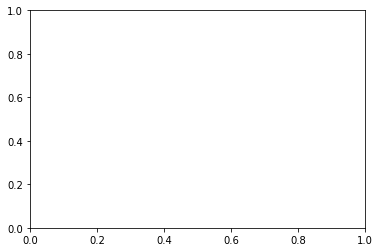

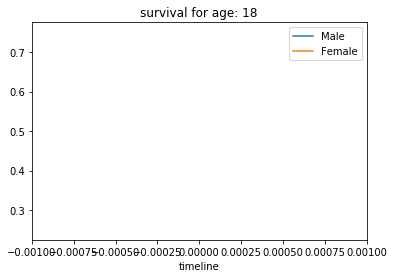

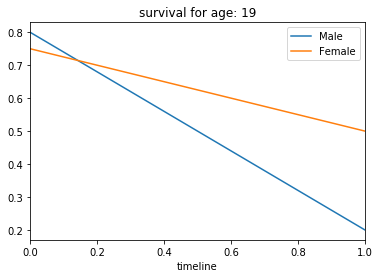

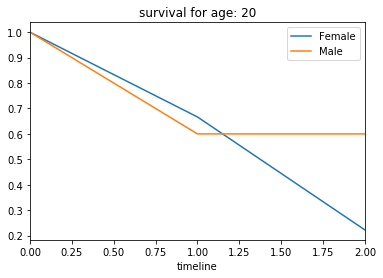

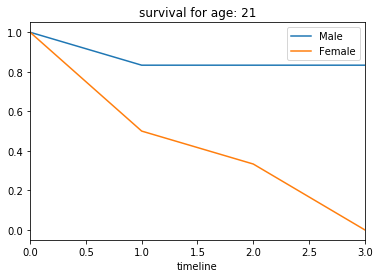

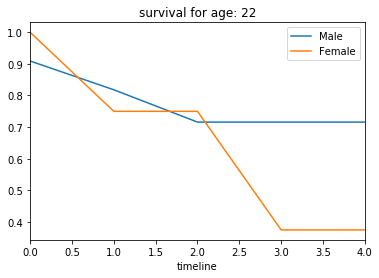

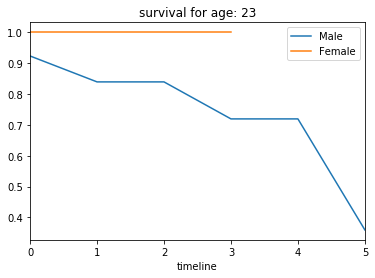

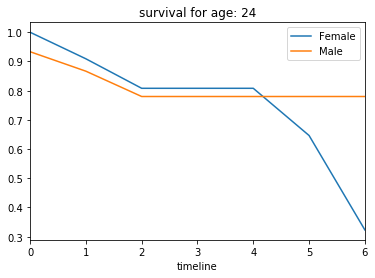

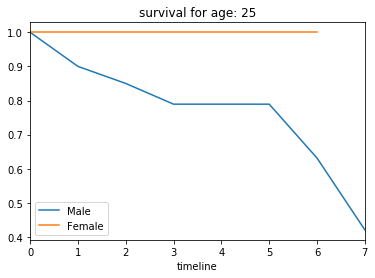

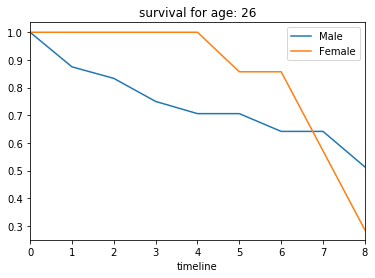

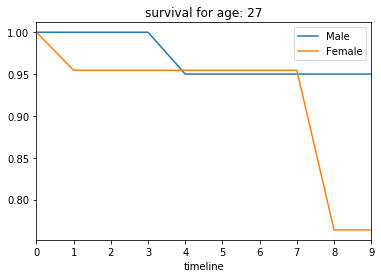

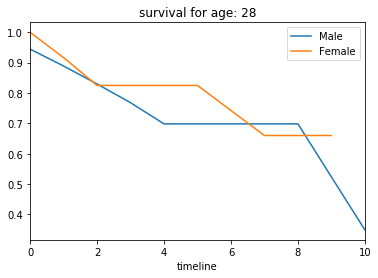

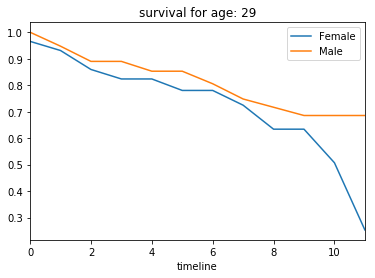

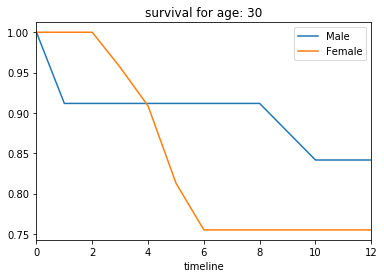

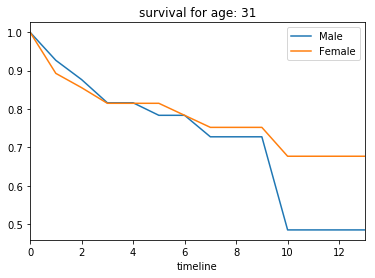

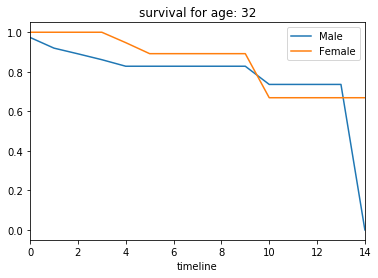

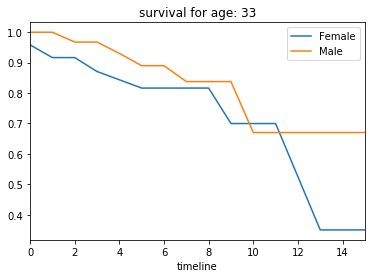

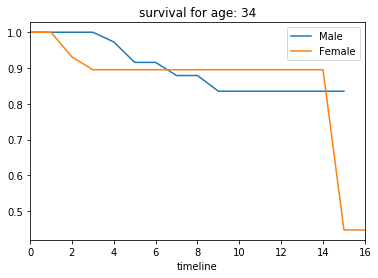

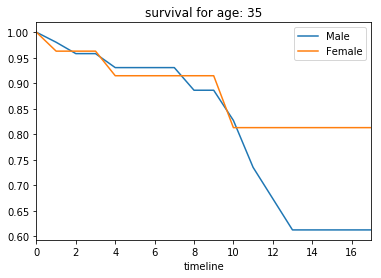

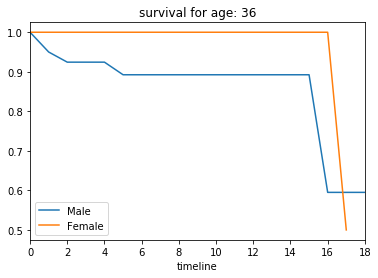

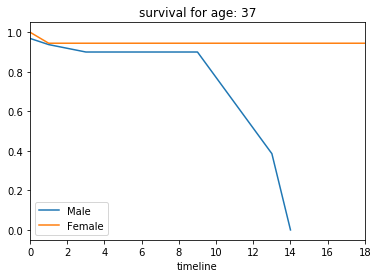

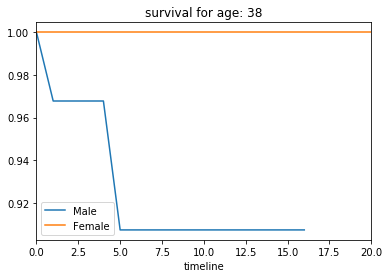

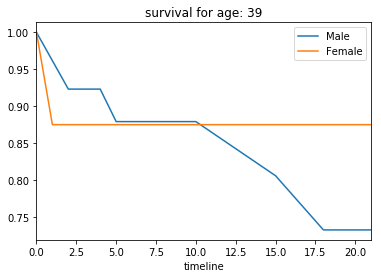

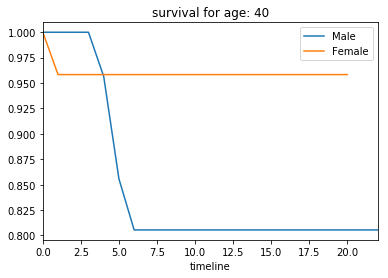

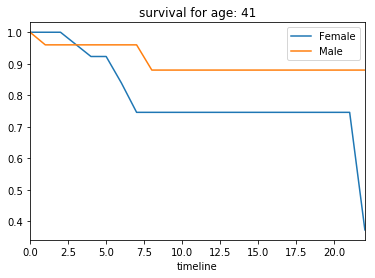

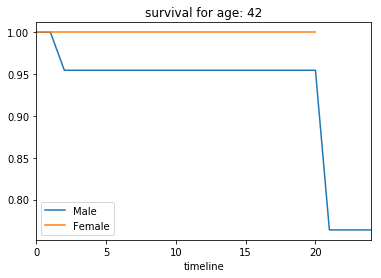

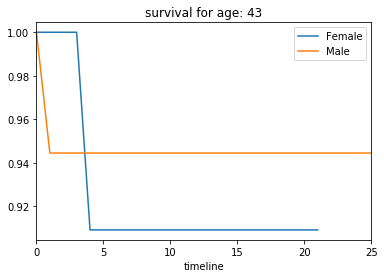

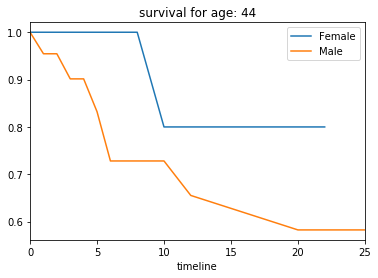

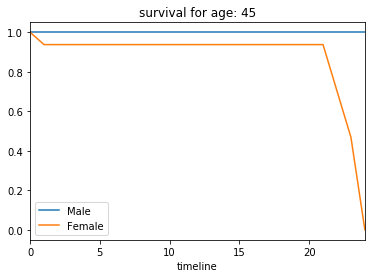

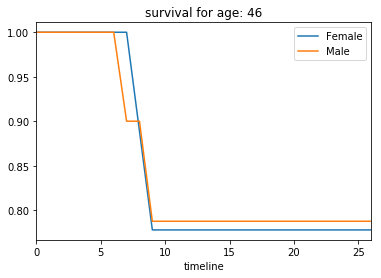

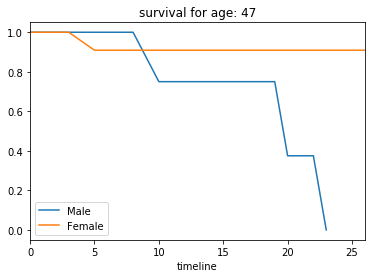

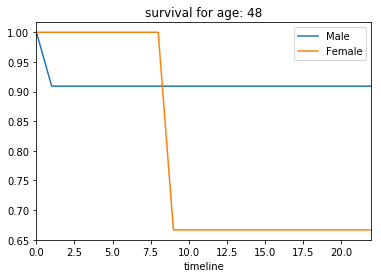

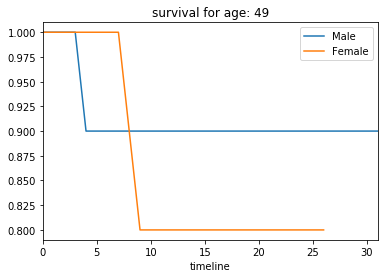

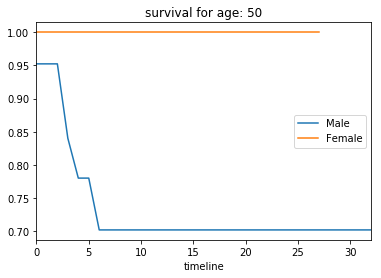

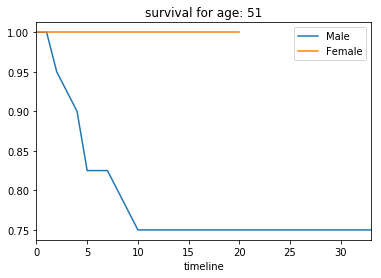

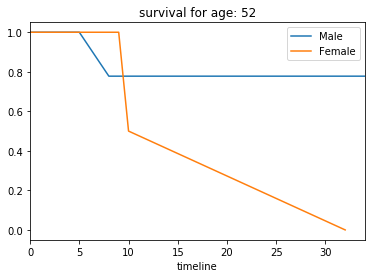

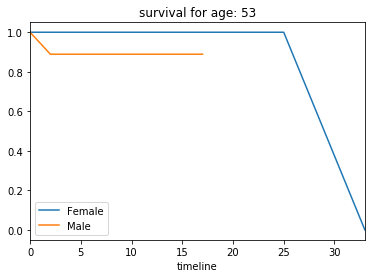

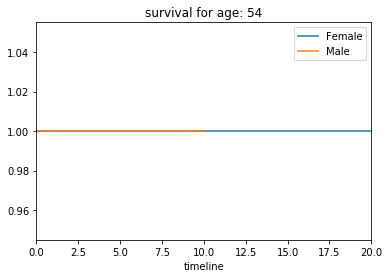

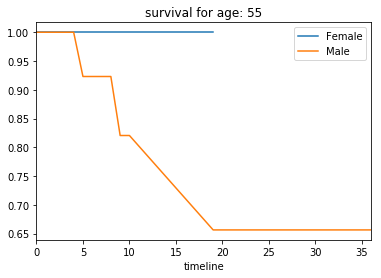

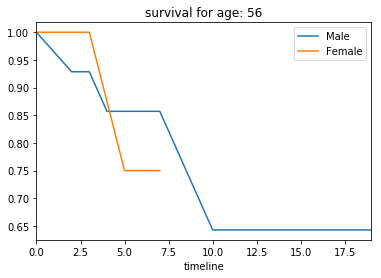

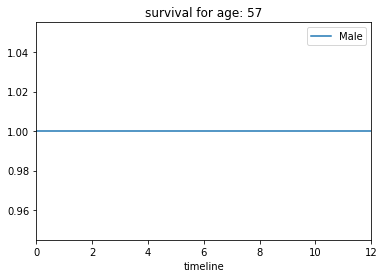

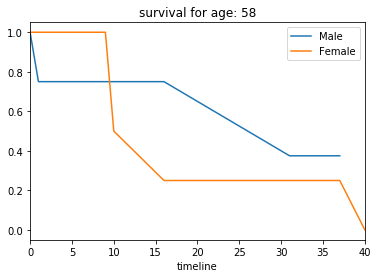

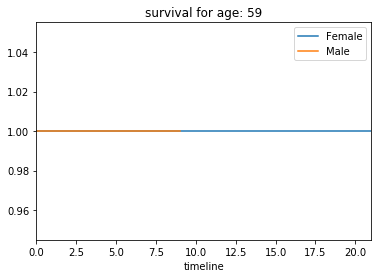

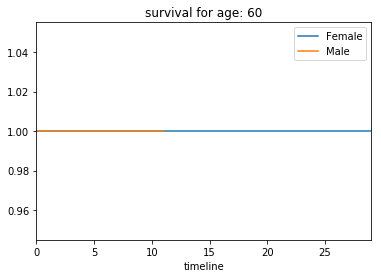

In [46]:

plt.subplot()

for age in list(set(data['Age'])):
    
    graf1 = survival(data=data[data['Age']==age], group_field='Gender', time_field='YearsAtCompany', event_field="Attrition").plot()
    plt.title('survival for age: {}'.format(age))

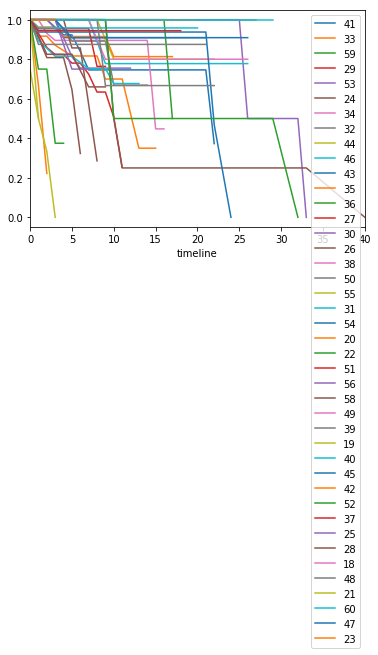

In [38]:
graf2 = survival(data=data[data['Gender']=='Female'], group_field='Age', time_field='YearsAtCompany', event_field="Attrition").plot()


## 3. Let's look at retention rate by gender from a third perspective - the number of years since the employee's last promotion. Generate and plot a survival curve showing this.

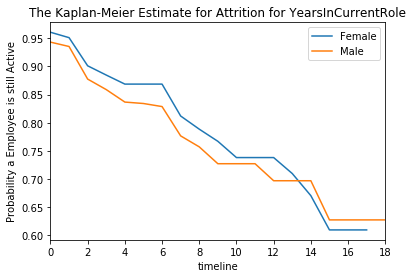

In [55]:
survival(data=data, group_field='Gender', time_field='YearsInCurrentRole', event_field="Attrition").plot()
plt.title("The Kaplan-Meier Estimate for Attrition for YearsInCurrentRole")
plt.ylabel("Probability a Employee is still Active")
plt.show()

## 4. Let's switch to looking at retention rates from another demographic perspective: marital status. Generate and plot survival curves for the different marital statuses by number of years at the company.

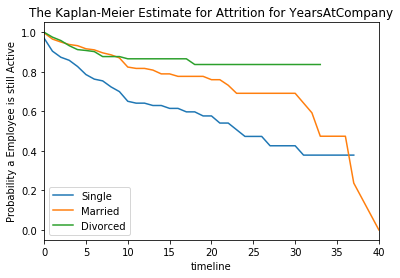

In [53]:
survival(data=data, group_field='MaritalStatus', time_field='YearsAtCompany', event_field="Attrition").plot()
plt.title("The Kaplan-Meier Estimate for Attrition for YearsAtCompany")
plt.ylabel("Probability a Employee is still Active")
plt.show()

## 5. Let's also look at the marital status curves by employee age. Generate and plot the survival curves showing retention rates by marital status and age.

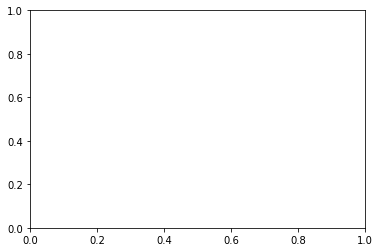

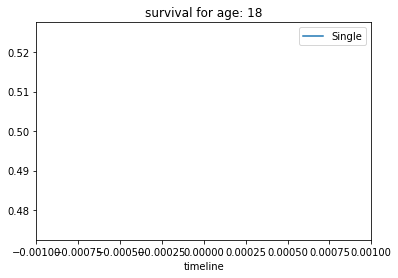

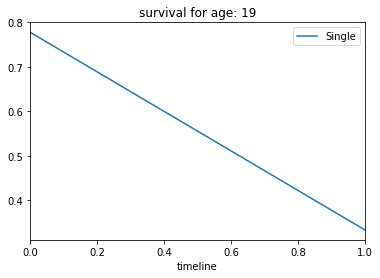

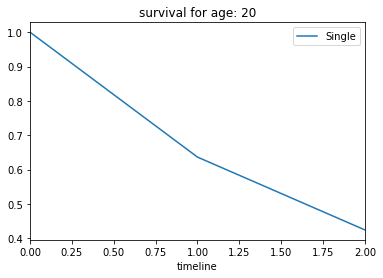

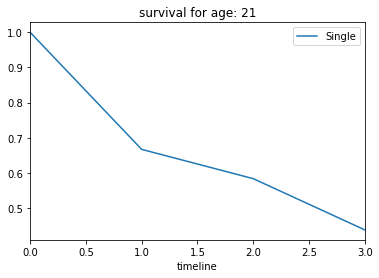

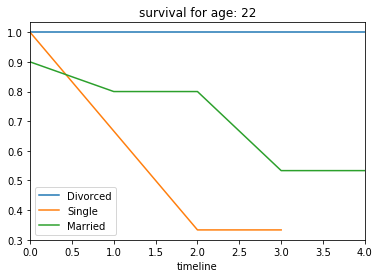

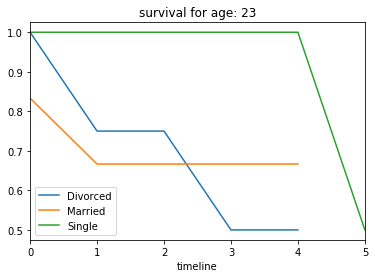

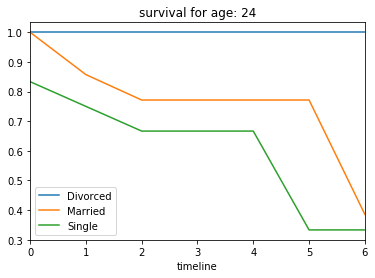

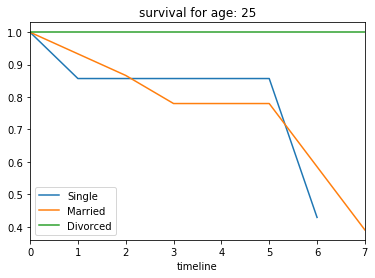

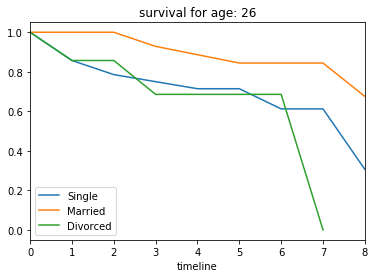

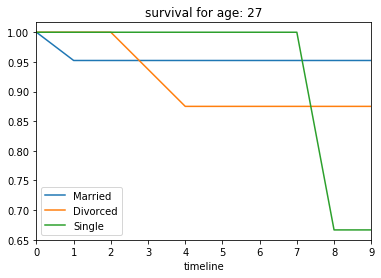

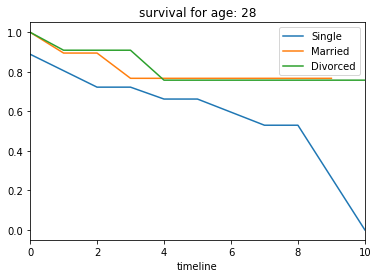

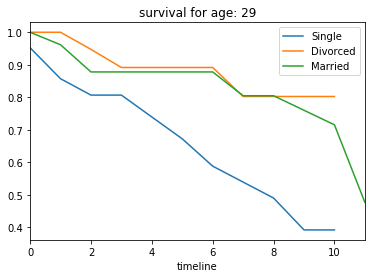

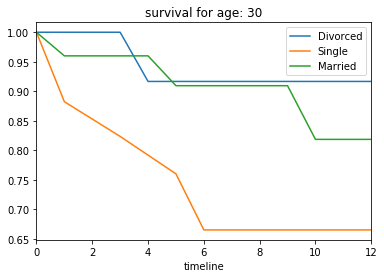

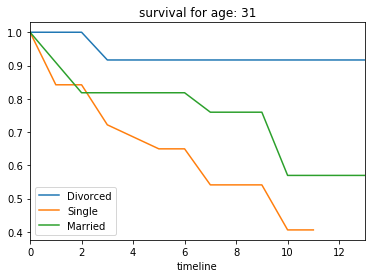

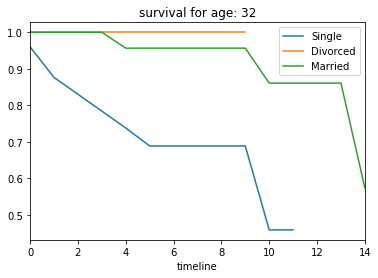

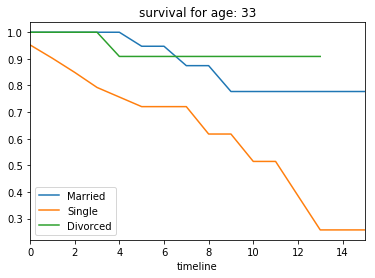

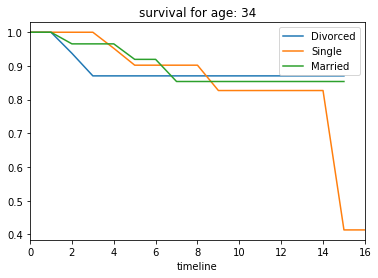

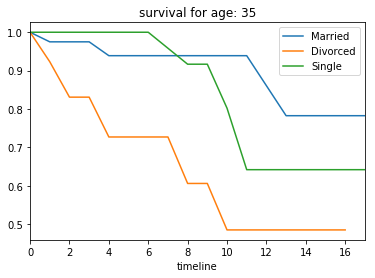

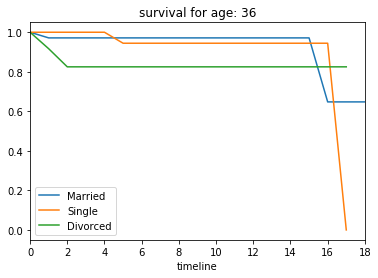

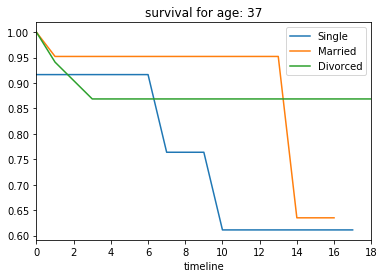

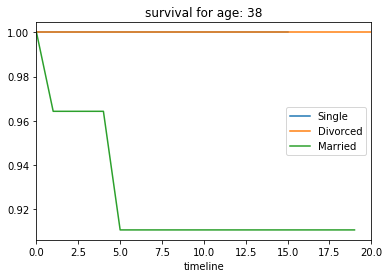

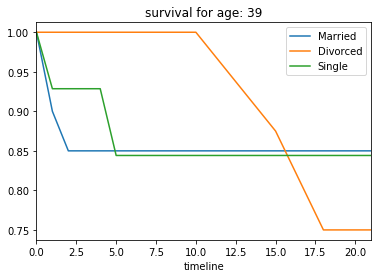

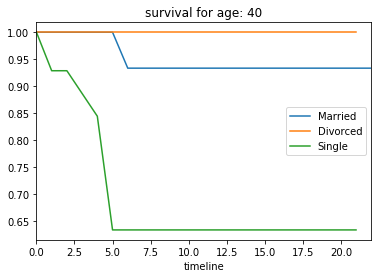

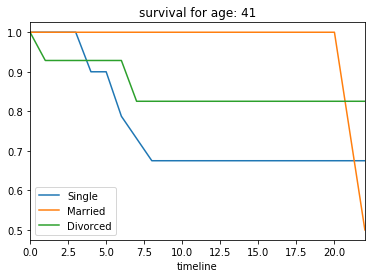

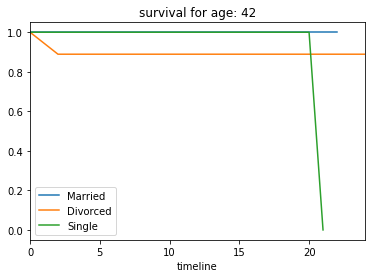

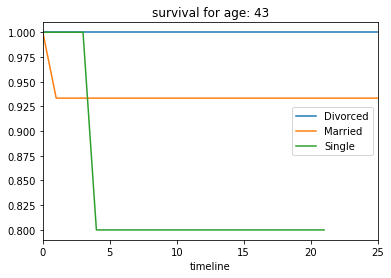

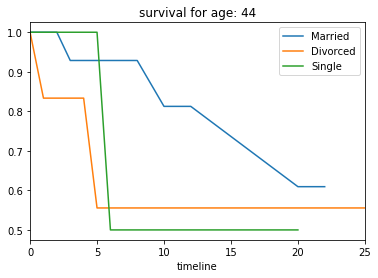

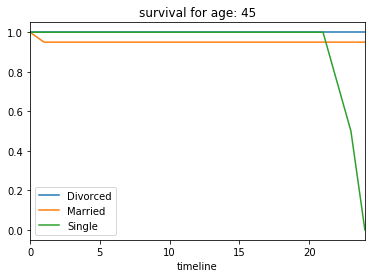

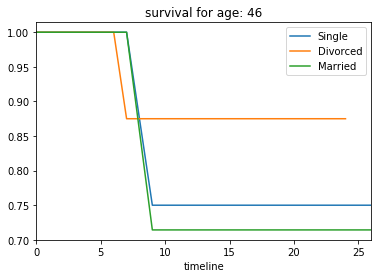

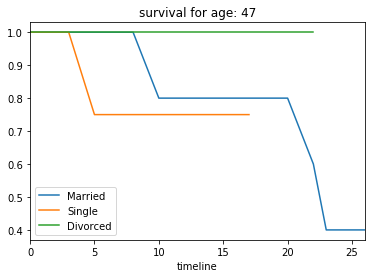

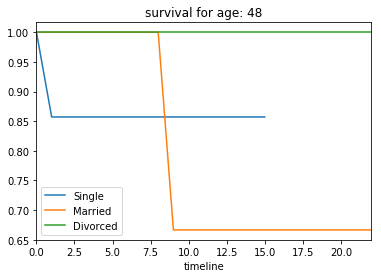

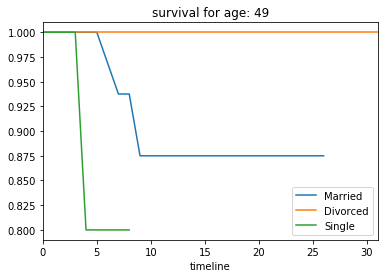

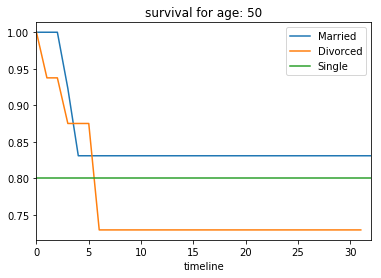

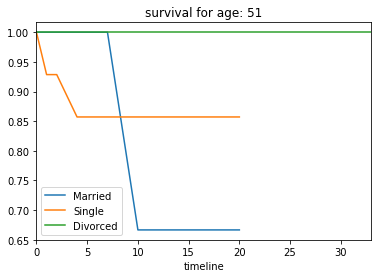

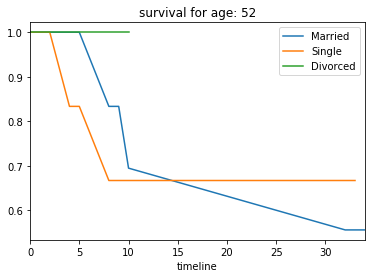

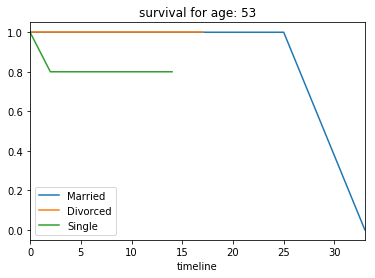

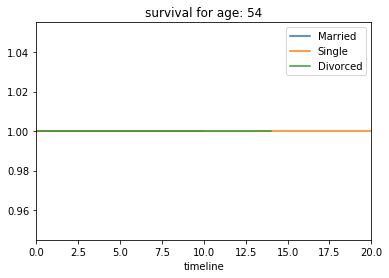

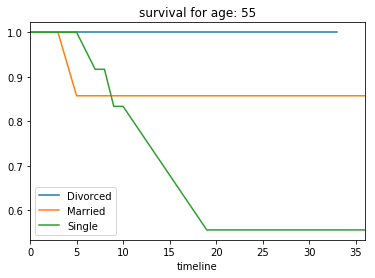

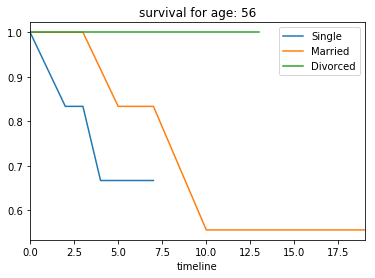

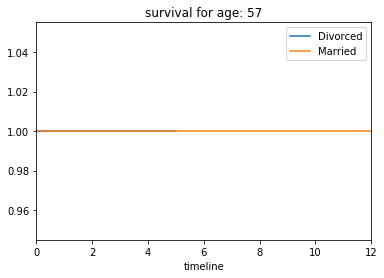

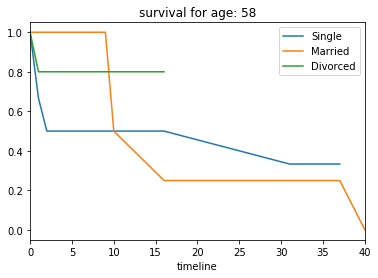

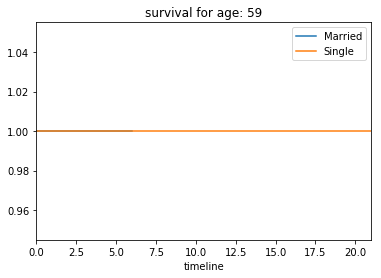

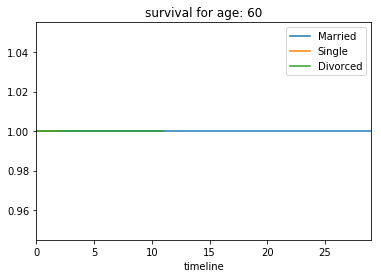

In [47]:

plt.subplot()

for age in list(set(data['Age'])):
    
    graf3 = survival(data=data[data['Age']==age], group_field='MaritalStatus', time_field='YearsAtCompany', event_field="Attrition").plot()
    plt.title('survival for age: {}'.format(age))

## 6. Now that we have looked at the retention rates by gender and marital status individually, let's look at them together. 

Create a new field in the data set that concatenates marital status and gender, and then generate and plot a survival curve that shows the retention by this new field over the age of the employee.

In [48]:
data['gender_marital'] = data['Gender'] + '-' + data['MaritalStatus']

In [49]:
data['gender_marital'].unique()

array(['Female-Single', 'Male-Married', 'Male-Single', 'Female-Married',
       'Male-Divorced', 'Female-Divorced'], dtype=object)

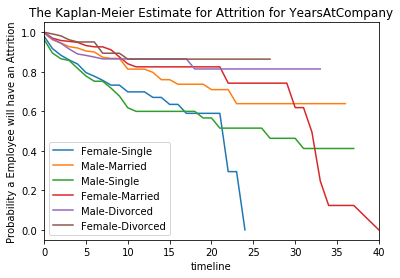

In [52]:
survival(data=data, group_field='gender_marital', time_field='YearsAtCompany', event_field="Attrition").plot()
plt.title("The Kaplan-Meier Estimate for Attrition for YearsAtCompany")
plt.ylabel("Probability a Employee will have an Attrition")
plt.show()

## 6. Let's find out how job satisfaction affects retention rates. Generate and plot survival curves for each level of job satisfaction by number of years at the company.

In [57]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'gender_marital'],
      dtype='object')

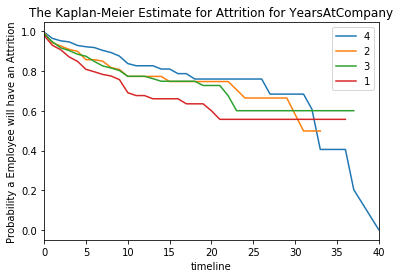

In [58]:
survival(data=data, group_field='JobSatisfaction', time_field='YearsAtCompany', event_field="Attrition").plot()
plt.title("The Kaplan-Meier Estimate for Attrition for YearsAtCompany")
plt.ylabel("Probability a Employee will have an Attrition")
plt.show()

## 7. Let's investigate whether the department the employee works in has an impact on how long they stay with the company. Generate and plot survival curves showing retention by department and years the employee has worked at the company.

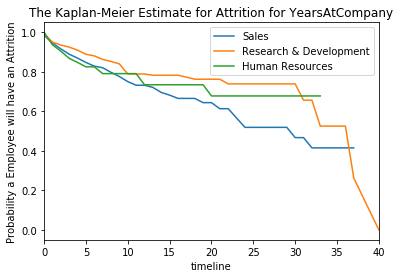

In [59]:
survival(data=data, group_field='Department', time_field='YearsAtCompany', event_field="Attrition").plot()
plt.title("The Kaplan-Meier Estimate for Attrition for YearsAtCompany")
plt.ylabel("Probability a Employee will have an Attrition")
plt.show()

## 8. From the previous example, it looks like the sales department has the highest attrition. Let's drill down on this and look at what the survival curves for specific job roles within that department look like.

Filter the data set for just the sales department and then generate and plot survival curves by job role and the number of years at the company.

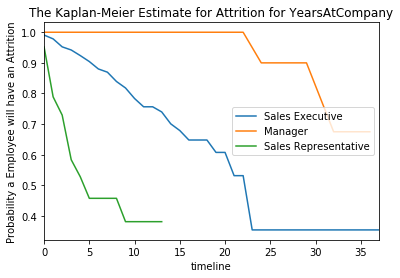

In [60]:
survival(data=data[data['Department']=='Sales'], group_field='JobRole', time_field='YearsAtCompany', event_field="Attrition").plot()
plt.title("The Kaplan-Meier Estimate for Attrition for YearsAtCompany")
plt.ylabel("Probability a Employee will have an Attrition")
plt.show()

## 9. Let examine how compensation affects attrition.

- Use the `pd.qcut` method to bin the HourlyRate field into 5 different pay grade categories (Very Low, Low, Moderate, High, and Very High).
- Generate and plot survival curves showing employee retention by pay grade and age.

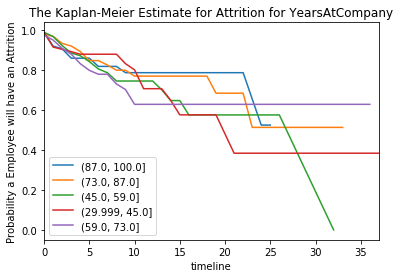

In [62]:
data['grade_compensation']=pd.qcut(x=data['HourlyRate'], q=5)

survival(data=data[data['Department']=='Sales'], group_field='grade_compensation', time_field='YearsAtCompany', event_field="Attrition").plot()
plt.title("The Kaplan-Meier Estimate for Attrition for YearsAtCompany")
plt.ylabel("Probability a Employee will have an Attrition")
plt.show()

## 10. Finally, let's take a look at how the demands of the job impact employee attrition.

- Create a new field whose values are 'Overtime' or 'Regular Hours' depending on whether there is a Yes or a No in the OverTime field.
- Create a new field that concatenates that field with the BusinessTravel field.
- Generate and plot survival curves showing employee retention based on these conditions and employee age.

In [63]:
data['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [64]:
data['over_regular']=data['OverTime'].apply(lambda x: 'Overtime' if x=='Yes' else 'Regular Hours')

In [65]:
data['Travel_overtime'] = data['over_regular']+' - '+data["BusinessTravel"]

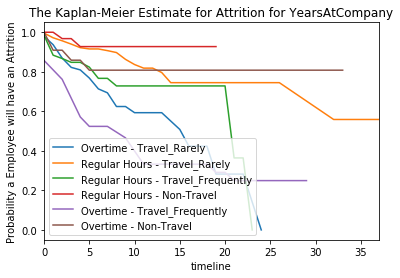

In [66]:
survival(data=data[data['Department']=='Sales'], group_field='Travel_overtime', time_field='YearsAtCompany', event_field="Attrition").plot()
plt.title("The Kaplan-Meier Estimate for Attrition for YearsAtCompany")
plt.ylabel("Probability a Employee will have an Attrition")
plt.show()